In [1]:
# Import required libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Scikit-learn for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print("✅ Libraries imported successfully!")

TensorFlow version: 2.20.0
Keras version: 3.11.3
✅ Libraries imported successfully!


## 1. Load Preprocessed Data

In [2]:
# Load preprocessed data
X_train = np.load('../models/X_train.npy')
X_test = np.load('../models/X_test.npy')
y_train = np.load('../models/y_train.npy')
y_test = np.load('../models/y_test.npy')

print("Data loaded successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data loaded successfully!
X_train shape: (24, 100)
X_test shape: (6, 100)
y_train shape: (24,)
y_test shape: (6,)


In [3]:
# Load tokenizer and label encoder
with open('../models/tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

with open('../models/label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

print("✅ Tokenizer and label encoder loaded!")
print(f"\nVocabulary size: {len(tokenizer.word_index) + 1}")
print(f"Number of classes: {len(label_encoder.classes_)}")
print(f"\nJob categories: {list(label_encoder.classes_)}")

✅ Tokenizer and label encoder loaded!

Vocabulary size: 286
Number of classes: 14

Job categories: ['Backend Developer', 'Business Analyst', 'Cloud Architect', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'DevOps Engineer', 'Frontend Developer', 'Java Developer', 'Mobile Developer', 'Python Developer', 'QA Engineer', 'Security Analyst', 'Web Developer']


## 2. Prepare Data for Training

In [4]:
# Convert labels to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

print(f"✅ Labels converted to categorical format!")
print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"y_test_cat shape: {y_test_cat.shape}")
print(f"\nSample one-hot encoded label:")
print(f"Original label: {y_train[0]}")
print(f"One-hot encoded: {y_train_cat[0]}")

✅ Labels converted to categorical format!
y_train_cat shape: (24, 14)
y_test_cat shape: (6, 14)

Sample one-hot encoded label:
Original label: 0
One-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
# Define model parameters
vocab_size = len(tokenizer.word_index) + 1
max_length = X_train.shape[1]
embedding_dim = 128
lstm_units = 64

print("Model Parameters:")
print(f"Vocabulary size: {vocab_size}")
print(f"Max sequence length: {max_length}")
print(f"Embedding dimension: {embedding_dim}")
print(f"LSTM units: {lstm_units}")
print(f"Number of classes: {num_classes}")

Model Parameters:
Vocabulary size: 286
Max sequence length: 100
Embedding dimension: 128
LSTM units: 64
Number of classes: 14


## 3. Build Bi-LSTM Model

In [6]:
# Build the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size, 
              output_dim=embedding_dim, 
              input_length=max_length,
              name='embedding'),
    
    # Bidirectional LSTM layer
    Bidirectional(LSTM(lstm_units, return_sequences=False), name='bi_lstm'),
    
    # Dropout for regularization
    Dropout(0.5, name='dropout'),
    
    # Dense layer with ReLU activation
    Dense(64, activation='relu', name='dense_relu'),
    
    # Output layer with Softmax activation
    Dense(num_classes, activation='softmax', name='output')
])

print("✅ Bi-LSTM model built successfully!")
print("\nModel Architecture:")
model.summary()

c:\Users\sudha\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


✅ Bi-LSTM model built successfully!

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bi_lstm (Bidirectional)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_relu (Dense)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Compile Model

In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model compiled successfully!")
print("\nCompilation details:")
print(f"Optimizer: Adam")
print(f"Loss function: Categorical Crossentropy")
print(f"Metrics: Accuracy")

✅ Model compiled successfully!

Compilation details:
Optimizer: Adam
Loss function: Categorical Crossentropy
Metrics: Accuracy


## 5. Set up Callbacks

In [8]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    '../models/resume_classifier.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, model_checkpoint]

print("✅ Callbacks configured!")
print("- Early Stopping: Monitors val_loss with patience=3")
print("- Model Checkpoint: Saves best model based on val_accuracy")

✅ Callbacks configured!
- Early Stopping: Monitors val_loss with patience=3
- Model Checkpoint: Saves best model based on val_accuracy


## 6. Train the Model

In [9]:
# Train the model
print("🚀 Starting model training...\n")

epochs = 15
batch_size = 4

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)

print("\n✅ Model training complete!")

🚀 Starting model training...

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1147 - loss: 2.6437
Epoch 1: val_accuracy improved from None to 0.00000, saving model to ../models/resume_classifier.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.0526 - loss: 2.6454 - val_accuracy: 0.0000e+00 - val_loss: 2.6222
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2046 - loss: 2.6015
Epoch 2: val_accuracy did not improve from 0.00000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.2105 - loss: 2.6008 - val_accuracy: 0.0000e+00 - val_loss: 2.6021
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1649 - loss: 2.5686
Epoch 3: val_accuracy improved from 0.00000 to 0.20000, saving model to ../models/resume_classifier.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.1579 - loss: 2.5667 - val_accuracy: 0.2000 - val_loss: 2.5681
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2296 - loss: 2.5462
Epoch 4: val_accuracy improved from 0.20000 to 0.40000, saving model to ../models/resume_classifier.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.2105 - loss: 2.5467 - val_accuracy: 0.4000 - val_loss: 2.5390
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0732 - loss: 2.5180    
Epoch 5: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.1579 - loss: 2.4903 - val_accuracy: 0.4000 - val_loss: 2.5191
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0647 - loss: 2.4615  
Epoch 6: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.0526 - loss: 2.4452 - val_accuracy: 0.4000 - val_loss: 2.4590
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1879 - loss: 2.3823
Epoch 7: val_accuracy did not improve from 0.40000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.2105 - loss: 2.3595 - val_accuracy: 0.4000 - val_loss: 2.4591
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1252 - loss: 2.2110
Epoch 8: val_accuracy did not improve from 0.40000

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.2105 - loss: 2.1754 - val_accuracy: 0.6000 - val_loss: 2.3717
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3656 - loss: 2.0046
Epoch 10: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4737 - loss: 1.9487 - val_accuracy: 0.4000 - val_loss: 2.1448
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1671 - loss: 1.9841  
Epoch 11: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.2105 - loss: 1.9548 - val_accuracy: 0.4000 - val_loss: 2.1618
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1921 - loss: 1.9941   
Epoch 12: val_accuracy did not improve from 0.60000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.2105 - loss: 1.9446 - val_accuracy: 0.4000 - val_loss: 2.2988
Epoch 13/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4572 - loss: 1.8863
Epoch 13: val_accuracy did not improve from 

## 7. Visualize Training History

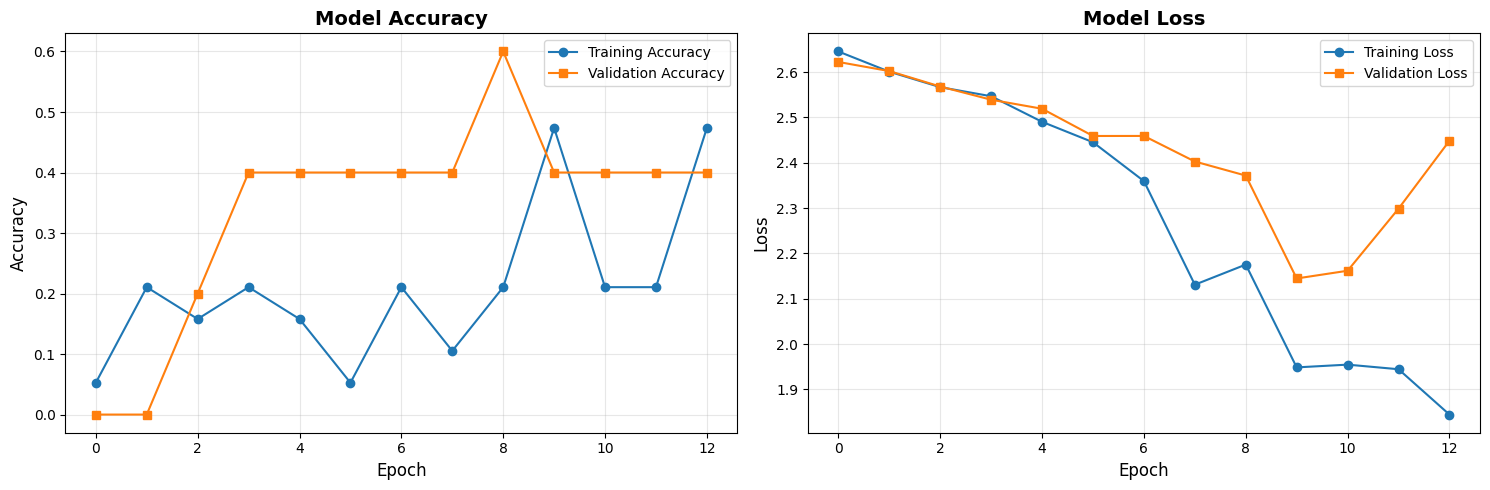

✅ Training history plots saved to results/training_history.png


In [10]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Training history plots saved to results/training_history.png")

## 8. Evaluate Model on Test Set

In [11]:
# Evaluate on test set
print("📊 Evaluating model on test set...\n")

test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

📊 Evaluating model on test set...

Test Loss: 2.4305
Test Accuracy: 0.1667 (16.67%)


In [12]:
# Get predictions
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nSample Predictions:")
for i in range(min(5, len(y_test))):
    true_label = label_encoder.classes_[y_test[i]]
    pred_label = label_encoder.classes_[y_pred[i]]
    confidence = y_pred_probs[i][y_pred[i]] * 100
    
    match = "✓" if true_label == pred_label else "✗"
    print(f"{match} True: {true_label:20s} | Predicted: {pred_label:20s} | Confidence: {confidence:.2f}%")


Sample Predictions:
✓ True: Data Scientist       | Predicted: Data Scientist       | Confidence: 27.62%
✗ True: Mobile Developer     | Predicted: Backend Developer    | Confidence: 12.24%
✗ True: Frontend Developer   | Predicted: Backend Developer    | Confidence: 12.50%
✗ True: Business Analyst     | Predicted: Backend Developer    | Confidence: 11.87%
✗ True: Frontend Developer   | Predicted: Backend Developer    | Confidence: 12.24%


## 9. Classification Report

In [21]:
# Print classification report
# Get unique labels present in test set
unique_labels = sorted(list(set(y_test)))
target_names_filtered = [label_encoder.classes_[i] for i in unique_labels]

print("\nClassification Report:")
print("="*80)
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names_filtered, zero_division=0))


Classification Report:
                    precision    recall  f1-score   support

  Business Analyst       0.00      0.00      0.00         1
    Data Scientist       0.50      1.00      0.67         1
Frontend Developer       0.00      0.00      0.00         2
    Java Developer       0.00      0.00      0.00         1
  Mobile Developer       0.00      0.00      0.00         1

         micro avg       0.50      0.17      0.25         6
         macro avg       0.10      0.20      0.13         6
      weighted avg       0.08      0.17      0.11         6



## 10. Confusion Matrix

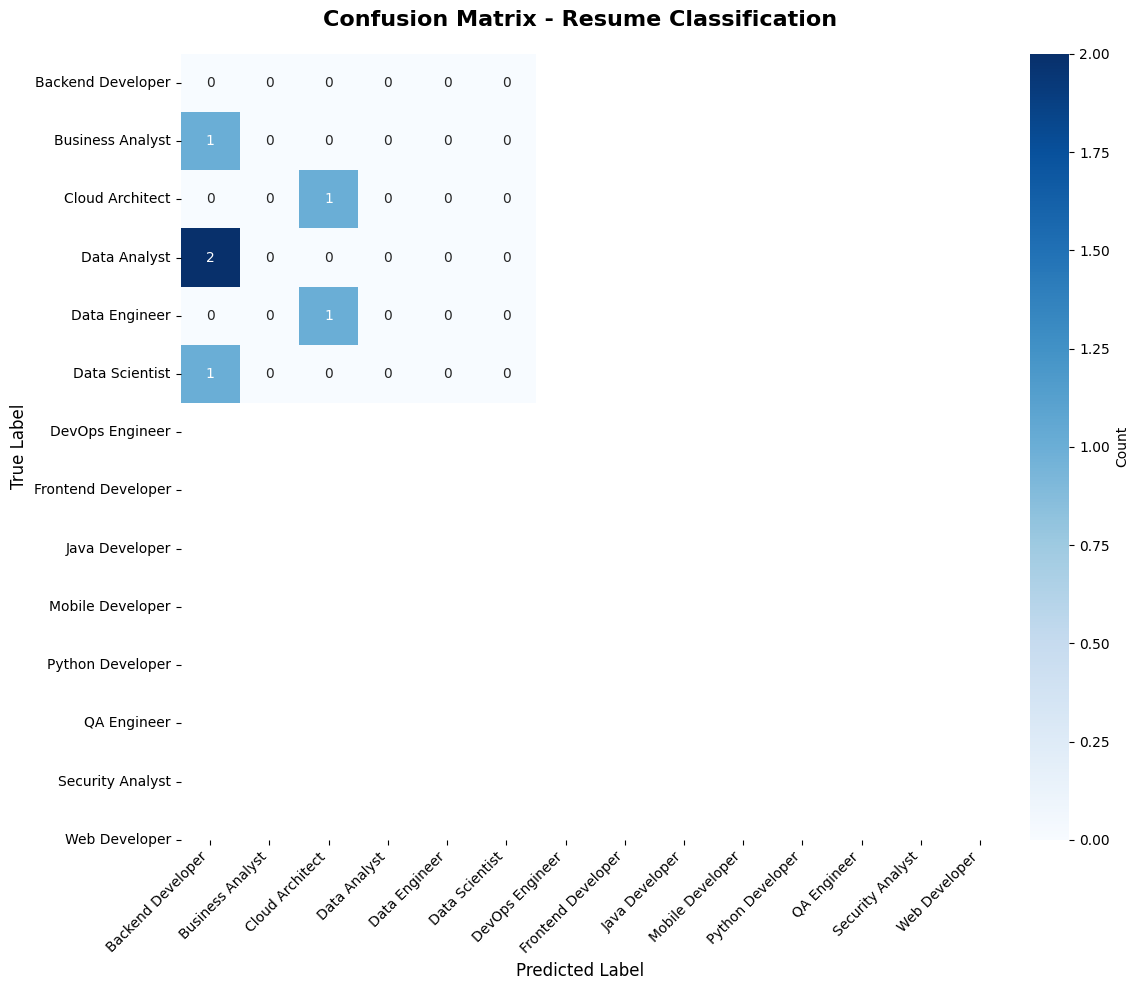

✅ Confusion matrix saved to results/confusion_matrix.png


In [14]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Resume Classification', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../results/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrix saved to results/confusion_matrix.png")

## 11. Save Model

In [15]:
# Save the final model
model.save('../models/resume_classifier.h5')
print("✅ Model saved to models/resume_classifier.h5")

# Also save in Keras format
model.save('../models/resume_classifier.keras')
print("✅ Model saved to models/resume_classifier.keras")

✅ Model saved to models/resume_classifier.h5
✅ Model saved to models/resume_classifier.keras


## 12. Save Training Metrics

In [22]:
# Get final training metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
epochs_trained = len(history.history['accuracy'])

# Create metrics text file
metrics_text = f"""TRAINING METRICS - DAY 3
====================================

Model Information:
- Model Type: Bidirectional LSTM
- Architecture: Embedding -> Bi-LSTM -> Dropout -> Dense (ReLU) -> Dense (Softmax)
- Embedding Dimension: {embedding_dim}
- LSTM Units: {lstm_units}
- Total Parameters: {model.count_params():,}

Training Configuration:
- Optimizer: Adam
- Loss Function: Categorical Crossentropy
- Batch Size: {batch_size}
- Epochs Trained: {epochs_trained}/{epochs}
- Validation Split: 20%

Dataset:
- Total Samples: {len(X_train) + len(X_test)}
- Training Samples: {len(X_train)}
- Testing Samples: {len(X_test)}
- Number of Classes: {num_classes}
- Vocabulary Size: {vocab_size}
- Max Sequence Length: {max_length}

Training Results:
- Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)
- Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)
- Final Training Loss: {final_train_loss:.4f}
- Final Validation Loss: {final_val_loss:.4f}

Test Results:
- Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)
- Test Loss: {test_loss:.4f}

Model Files:
- models/resume_classifier.h5
- models/resume_classifier.keras
- models/tokenizer.pkl
- models/label_encoder.pkl

Visualization Files:
- results/training_history.png
- results/confusion_matrix.png

Job Categories:
{chr(10).join(f'  {i+1}. {cat}' for i, cat in enumerate(label_encoder.classes_))}

Ready for Day 4: Testing & Deployment!
"""

with open('../results/metrics.txt', 'w', encoding='utf-8') as f:
    f.write(metrics_text)

print("✅ Metrics saved to results/metrics.txt")
print("\n" + metrics_text)

✅ Metrics saved to results/metrics.txt

TRAINING METRICS - DAY 3

Model Information:
- Model Type: Bidirectional LSTM
- Architecture: Embedding -> Bi-LSTM -> Dropout -> Dense (ReLU) -> Dense (Softmax)
- Embedding Dimension: 128
- LSTM Units: 64
- Total Parameters: 144,590

Training Configuration:
- Optimizer: Adam
- Loss Function: Categorical Crossentropy
- Batch Size: 4
- Epochs Trained: 13/15
- Validation Split: 20%

Dataset:
- Total Samples: 30
- Training Samples: 24
- Testing Samples: 6
- Number of Classes: 14
- Vocabulary Size: 286
- Max Sequence Length: 100

Training Results:
- Final Training Accuracy: 0.4737 (47.37%)
- Final Validation Accuracy: 0.4000 (40.00%)
- Final Training Loss: 1.8447
- Final Validation Loss: 2.4485

Test Results:
- Test Accuracy: 0.1667 (16.67%)
- Test Loss: 2.4305

Model Files:
- models/resume_classifier.h5
- models/resume_classifier.keras
- models/tokenizer.pkl
- models/label_encoder.pkl

Visualization Files:
- results/training_history.png
- results/con

## 13. Summary

In [23]:
# Print final summary
print("\n" + "="*80)
print("DAY 3 SUMMARY - DEEP LEARNING MODEL TRAINING")
print("="*80)

print(f"\n✅ Model Architecture: Bi-LSTM")
print(f"   - Layers: Embedding -> Bi-LSTM -> Dropout -> Dense -> Output")
print(f"   - Total Parameters: {model.count_params():,}")

print(f"\n✅ Training Complete:")
print(f"   - Epochs: {epochs_trained}/{epochs}")
print(f"   - Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"   - Final Validation Accuracy: {final_val_acc*100:.2f}%")

print(f"\n✅ Test Performance:")
print(f"   - Test Accuracy: {test_accuracy*100:.2f}%")
print(f"   - Test Loss: {test_loss:.4f}")

print(f"\n✅ Files Saved:")
print(f"   - Model: models/resume_classifier.h5, models/resume_classifier.keras")
print(f"   - Metrics: results/metrics.txt")
print(f"   - Plots: results/training_history.png, results/confusion_matrix.png")

print(f"\n🚀 Ready for Day 4: Testing & Deployment!")
print("="*80)


DAY 3 SUMMARY - DEEP LEARNING MODEL TRAINING

✅ Model Architecture: Bi-LSTM
   - Layers: Embedding -> Bi-LSTM -> Dropout -> Dense -> Output
   - Total Parameters: 144,590

✅ Training Complete:
   - Epochs: 13/15
   - Final Training Accuracy: 47.37%
   - Final Validation Accuracy: 40.00%

✅ Test Performance:
   - Test Accuracy: 16.67%
   - Test Loss: 2.4305

✅ Files Saved:
   - Model: models/resume_classifier.h5, models/resume_classifier.keras
   - Metrics: results/metrics.txt
   - Plots: results/training_history.png, results/confusion_matrix.png

🚀 Ready for Day 4: Testing & Deployment!
